In [ ]:
#필요한 라이브러리 세팅
from skimage.transform import resize
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
from google.colab.patches import cv2_imshow
import cv2

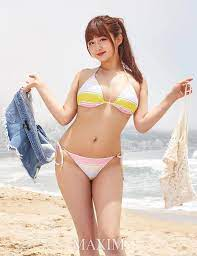

In [ ]:
#이미지 읽어지는지 테스트
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/soft/soft_10.jpg')
#height, width, channel = img.shape
#print(height, width , channel)
cv2_imshow(img)

In [ ]:
data = np.asarray(img)
data.shape

(261, 193, 3)

In [ ]:
#이미지를 모두 128x128로 resize해서 저장
import glob
import os

img_benign_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/'
folder_list = ['normal','soft','adult']

for i in range (3) :
  img_path_selected = img_benign_path + folder_list[i]
  image_format = "*.png" if i==0 else "*.jpg"   #현재 normal사진들은 png
  image_format_file = ".png" if i==0 else ".jpg"   #현재 normal사진들은 png
  file_paths = glob.glob(os.path.join(img_path_selected, image_format))
  print(folder_list[i])
  print(len(file_paths))
  index = 0
  for img in file_paths:
    img = cv2.imread(img)
    if type(img) is np.ndarray:
      if img.size == 0:
        continue
    if img is None:
      continue
    resized_img = cv2.resize(img, dsize=(128, 128))
    #resize한 사진들 normal = 0 / soft = 1 / adult = 2 폴더에 저장
    new_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/'+str(i)+"/"
    cv2.imwrite(new_path+str(index)+image_format_file, resized_img)
    index += 1

normal
1000
soft
1000
adult
0


In [ ]:
#이미지를 모두 128x128로 resize해서 저장
import glob
import os
import cv2

img_benign_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/ adult'
img_path_selected = img_benign_path
file_paths = glob.glob(os.path.join(img_path_selected, "*.jpg"))
index = 0
for img in file_paths:
  img = cv2.imread(img)
  if type(img) is np.ndarray:
    if img.size == 0:
      continue
  if img is None:
    continue
  resized_img = cv2.resize(img, dsize=(128, 128))
  #resize한 사진들 normal = 0 / soft = 1 / adult = 2 폴더에 저장
  new_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/2/'
  cv2.imwrite(new_path+str(index)+".jpg", resized_img)
  index += 1

In [ ]:
#resize한 이미지들을 배열 형태로 변환
import glob
import numpy as np
from PIL import Image

img_benign_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/'
categories = ['0','1', '2']
np_classes = len(categories)

X=[]
y=[]

for idx, cat in enumerate(categories):
    img_dir_detail = img_benign_path + "/" + cat
    image_format = "*.png" if idx==0 else "*.jpg"   #현재 normal사진들은 png
    files = glob.glob(img_dir_detail+"/"+image_format)
    print("category : "+cat)  #0은 normal, 1은 soft, 2는 adult
    print(len(files)) #파일 수 출력
    
    for i, f in enumerate(files):
      try:
        img = Image.open(f)
        img = img.convert("RGB")
        data = np.asarray(img) #RGB이미지를 배열로 변환
        #Y는 0 아니면 1이니까 idx값으로 넣는다.
        X.append(data)  #값을 하나씩 추가
        y.append(idx)   #labeling도 추가
      except:
        print(cat, str(i)+" 번째에서 에러 ")

X = np.array(X) #각각 numpy 배열로 만들어줌
Y = np.array(y)

category : 0
1000
category : 1
971
category : 2
1000


In [ ]:
#NumPy format의 바이너리 파일로 저장하여 후작업에 대비
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

Y_train = to_categorical(Y_train, 3)
Y_test = to_categorical(Y_test, 3)

print(Y_train)
print(Y_test)
xy = (X_train, X_test, Y_train, Y_test)
np.save('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/128X128_image.npy', xy) #1개의 배열을 NumPy format의 바이너리 파일로 저장하기

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [1]:
#저장한 npy파일 가져와서 dataset 세팅
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras
import keras.backend as K
import tensorflow as tf
import numpy as np

print(tf.__version__)

X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/128X128_image.npy', allow_pickle=True) ###allow_pickle
print(X_train.shape)
print(y_train.shape)
print(X_train.shape[0])
print(y_train.shape[0])

2.4.1
(2673, 128, 128, 3)
(2673, 3)
2673
2673


In [ ]:
#model 설계
image_w = 128
image_h = 128
image_channels = 3
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

model = Sequential()
#필터 수 : 32개, 필터의 크기 : (3,3), 활성함수 : relu, input_shape : 128*128*3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_w, image_h, image_channels)))
#batch normalization적용 (데이터의 shape 변동 없음)
model.add(BatchNormalization())
#conv 출력 데이터에 (2,2) maxpooling 적용 (shape가 절반으로 줄어들고 채널 수는 그대로)
model.add(MaxPooling2D(pool_size=(2, 2)))


#두번째 레이어부터는 자동으로 입력 형태를 추정할 수 있기 때문에 따로 입력해주지 않아도 된다.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

#입력 데이터를 1차원으로 번형시킴 (default : rows->cols->channels순으로 변형)
model.add(Flatten())
#dense : 출력 데이터의 shape를 (,512)로 지정
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))   #출력 layer, class가 3개이므로 3, multi classification이기에 softmax

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.00004), metrics=['accuracy'])

model.summary()

import os

model_dir = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
model_path = model_dir + "128x128_adult_contents_detection.model"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

print(X_train.shape)
print(y_train.shape)

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

(2673, 128, 128, 3)
(2673, 3)


In [ ]:
#model 학습
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

print(X_train.shape)
print(y_train.shape)

from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.05, 
                                            min_lr=0)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1, callbacks=[learning_rate_reduction])

(2673, 128, 128, 3)
(2673, 3)
Epoch 1/100
76/76 [==============================] - 8s 21ms/step - loss: 1.0948 - accuracy: 0.6627 - val_loss: 3.0197 - val_accuracy: 0.3246
Epoch 2/100
76/76 [==============================] - 1s 16ms/step - loss: 0.2712 - accuracy: 0.8985 - val_loss: 3.6804 - val_accuracy: 0.3246
Epoch 3/100
76/76 [==============================] - 1s 16ms/step - loss: 0.1328 - accuracy: 0.9590 - val_loss: 3.5308 - val_accuracy: 0.3433

Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
Epoch 4/100
76/76 [==============================] - 1s 16ms/step - loss: 0.0620 - accuracy: 0.9826 - val_loss: 2.9003 - val_accuracy: 0.3806
Epoch 5/100
76/76 [==============================] - 1s 16ms/step - loss: 0.0562 - accuracy: 0.9866 - val_loss: 1.8984 - val_accuracy: 0.4776
Epoch 6/100
76/76 [==============================] - 1s 16ms/step - loss: 0.0614 - accuracy: 0.9842 - val_loss: 1.1475 - val_accuracy: 0.6381
Epoch 7/100
76/76 [==================

In [ ]:
####from keras.models import load_model

model.save('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/128x128_model_0.h5')

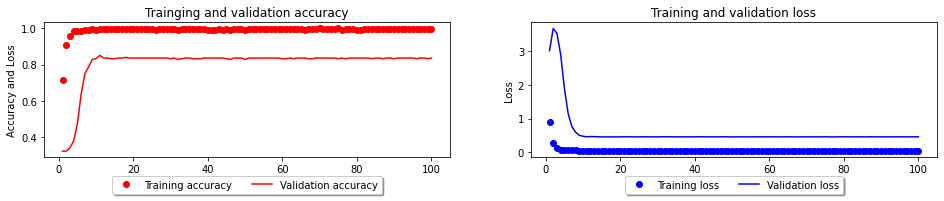

In [ ]:
#epoch 당 accuracy, loss 시각화
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

show_graph(history.history)

In [ ]:
#model test
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

10/10 [==============================] - 0s 8ms/step - loss: 0.4190 - accuracy: 0.8658
정확도 : 0.87 


In [ ]:
#model 불러오기
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/128x128_model_0.h5')

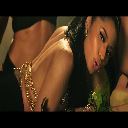

True


In [ ]:
#예측할 이미지 128x128로 resize
path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/'
img_name = 'exvideo_2_img003.jpg'
img = cv2.imread(path + img_name)
resized_img = cv2.resize(img, dsize=(128, 128))
cv2_imshow(resized_img)
print(cv2.imwrite("/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/"+'test_'+img_name, resized_img))

In [ ]:
predict_image_path = path+"test_"+img_name
img = io.imread(predict_image_path)
img = np.expand_dims(img, axis= 0)
pred = model(img, training=False)
print(pred)
print(np.argmax(pred, axis=1))

tf.Tensor([[0. 1. 0.]], shape=(1, 3), dtype=float32)
[1]
